# DS 3000 Lesson 5 (we skip 4 because of Lab 2 last Friday)

Sep 27 2022

### Admin:
- Qwickly Attendance (both in-person and virtual)
- Project assigned today
- Modules needed today (`seaborn, matplotlib, pandas`); if they are not installed, run (in terminal):
    - `pip install seaborn matplotlib pandas`
- Homework 2 due tonight, Homework 3 to be posted
- Quiz 1 will be posted Friday (you may choose any 2 hour chunk to complete it over the weekend)
     

### Content:
* Review: Loading Data and Data processing with `pandas`
* Plotting with `matplotlib` and `seaborn`:
    * histograms
    * scatter plots
    * line plots

# Loading Data into Pandas

Data comes from many places:
- Web Scraping
- Application Program Interface (API)
- SQL
- local file:
    - csv
    - JSON
    - fixed width tables (HTML)
    
### Pandas functions which load data
| Mode | Description
| ------ | :------
| **`read_csv`** | Load comma seperated values data from a file or URL (other delimeters too!)
| **`read_xlsx`** | Read data in xls format (Mircosoft Excel)
| **`read-fwf`** | Read data in fixed-width column format (i.e., no delimiters such as tab-separated txt files)
| **`read_clipboard`** | Version of read_csv that reads data from the clipboard; useful for converting tables from web pages
| **`read_html`** | Read all tables contained in the given HTML document.
| **`read_json`** | Read data from a JSON (JavaScript Object Notation) string representation


## Reading CSV (comma seperated value) into Pandas

A CSV is a spreadsheet.  It is a text file where:
- all the values of a row are seperated by commas
    - what a great name for the file type, right?
- all the rows are seperated by newline characters
    - newline `\n` is a special character which marks the end of a line
    - pressing `<enter>` inputs a newline in text editors


`pandas` functions:
- read_csv
    - header
    - index_col
    - dtype

In [1]:
import pandas as pd

# note: file must be in same folder as jupyter notebook
pd.read_csv('cleaner_gtky.csv')

,fake_student_id,time_stamp,class,co_op,prog_exp,python_exp,java_exp,r_exp,c_exp,age_months,ideal_start_salary_thousands
0,1380,09-09-22 15:37,Sophomore,No,9,Python,NaN,NaN,NaN,234.0,60.0
1,3926,09-09-22 16:01,Sophomore,No,7,Python,NaN,NaN,NaN,233.0,100.0
2,2394,09-09-22 14:19,Junior,Yes,7,Python,Java,NaN,NaN,252.0,70.0
3,4827,09-09-22 16:07,Junior,No,7,Python,Java,NaN,NaN,243.0,60.0
4,9977,09-09-22 16:06,Sophomore,No,5,Python,NaN,R,NaN,231.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...
92,3775,09-09-22 15:50,Junior,Yes,8,Python,NaN,R,NaN,262.0,100.0
93,1562,09-09-22 16:06,Sophomore,No,7,Java,NaN,NaN,NaN,230.0,73.0
94,9610,09-09-22 14:13,Senior,Yes,10,Python,Java,NaN,NaN,264.0,100.0
95,2120,09-09-22 13:46,Junior,Yes,2,Java,NaN,NaN,NaN,246.0,100.0


In [2]:
# how to specify index col (make sure this is uniquely identifiable!)
gtky = pd.read_csv('cleaner_gtky.csv', index_col='fake_student_id')
gtky.head()

,time_stamp,class,co_op,prog_exp,python_exp,java_exp,r_exp,c_exp,age_months,ideal_start_salary_thousands
fake_student_id,,,,,,,,,,
1380,09-09-22 15:37,Sophomore,No,9,Python,NaN,NaN,NaN,234.0,60.0
3926,09-09-22 16:01,Sophomore,No,7,Python,NaN,NaN,NaN,233.0,100.0
2394,09-09-22 14:19,Junior,Yes,7,Python,Java,NaN,NaN,252.0,70.0
4827,09-09-22 16:07,Junior,No,7,Python,Java,NaN,NaN,243.0,60.0
9977,09-09-22 16:06,Sophomore,No,5,Python,NaN,R,NaN,231.0,90.0


In [3]:
# index_col takes integer arguments too
gtky = pd.read_csv('cleaner_gtky.csv',index_col=0)
gtky.head()

,time_stamp,class,co_op,prog_exp,python_exp,java_exp,r_exp,c_exp,age_months,ideal_start_salary_thousands
fake_student_id,,,,,,,,,,
1380,09-09-22 15:37,Sophomore,No,9,Python,NaN,NaN,NaN,234.0,60.0
3926,09-09-22 16:01,Sophomore,No,7,Python,NaN,NaN,NaN,233.0,100.0
2394,09-09-22 14:19,Junior,Yes,7,Python,Java,NaN,NaN,252.0,70.0
4827,09-09-22 16:07,Junior,No,7,Python,Java,NaN,NaN,243.0,60.0
9977,09-09-22 16:06,Sophomore,No,5,Python,NaN,R,NaN,231.0,90.0


In [4]:
# read in data without an index
# both lines below do the same thing (index_col=None is default)
# pd.read_csv('cleaner_gtky.csv', index_col=None)
pd.read_csv('cleaner_gtky.csv')

,fake_student_id,time_stamp,class,co_op,prog_exp,python_exp,java_exp,r_exp,c_exp,age_months,ideal_start_salary_thousands
0,1380,09-09-22 15:37,Sophomore,No,9,Python,NaN,NaN,NaN,234.0,60.0
1,3926,09-09-22 16:01,Sophomore,No,7,Python,NaN,NaN,NaN,233.0,100.0
2,2394,09-09-22 14:19,Junior,Yes,7,Python,Java,NaN,NaN,252.0,70.0
3,4827,09-09-22 16:07,Junior,No,7,Python,Java,NaN,NaN,243.0,60.0
4,9977,09-09-22 16:06,Sophomore,No,5,Python,NaN,R,NaN,231.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...
92,3775,09-09-22 15:50,Junior,Yes,8,Python,NaN,R,NaN,262.0,100.0
93,1562,09-09-22 16:06,Sophomore,No,7,Java,NaN,NaN,NaN,230.0,73.0
94,9610,09-09-22 14:13,Senior,Yes,10,Python,Java,NaN,NaN,264.0,100.0
95,2120,09-09-22 13:46,Junior,Yes,2,Java,NaN,NaN,NaN,246.0,100.0


In [5]:
# read in a data which has no header
pd.read_csv('cleaner_gtky.csv', header=None)

,0,1,2,3,4,5,6,7,8,9,10
0,fake_student_id,time_stamp,class,co_op,prog_exp,python_exp,java_exp,r_exp,c_exp,age_months,ideal_start_salary_thousands
1,1380,09-09-22 15:37,Sophomore,No,9,Python,NaN,NaN,NaN,234,60
2,3926,09-09-22 16:01,Sophomore,No,7,Python,NaN,NaN,NaN,233,100
3,2394,09-09-22 14:19,Junior,Yes,7,Python,Java,NaN,NaN,252,70
4,4827,09-09-22 16:07,Junior,No,7,Python,Java,NaN,NaN,243,60
...,...,...,...,...,...,...,...,...,...,...,...
93,3775,09-09-22 15:50,Junior,Yes,8,Python,NaN,R,NaN,262,100
94,1562,09-09-22 16:06,Sophomore,No,7,Java,NaN,NaN,NaN,230,73
95,9610,09-09-22 14:13,Senior,Yes,10,Python,Java,NaN,NaN,264,100
96,2120,09-09-22 13:46,Junior,Yes,2,Java,NaN,NaN,NaN,246,100


## Saving a DataFrame as a csv
- `.to_csv()`
    - index=False
    - header=False
    - appending to csv (mode='a', header=None)

In [6]:
# check the head again
gtky.head()

,time_stamp,class,co_op,prog_exp,python_exp,java_exp,r_exp,c_exp,age_months,ideal_start_salary_thousands
fake_student_id,,,,,,,,,,
1380,09-09-22 15:37,Sophomore,No,9,Python,NaN,NaN,NaN,234.0,60.0
3926,09-09-22 16:01,Sophomore,No,7,Python,NaN,NaN,NaN,233.0,100.0
2394,09-09-22 14:19,Junior,Yes,7,Python,Java,NaN,NaN,252.0,70.0
4827,09-09-22 16:07,Junior,No,7,Python,Java,NaN,NaN,243.0,60.0
9977,09-09-22 16:06,Sophomore,No,5,Python,NaN,R,NaN,231.0,90.0


In [7]:
# doesn't save index into first column of csv
gtky.to_csv('gtky_copy.csv', index=False)

In [8]:
# doesn't save header into first row of csv
gtky.to_csv('gtky_copy_no_head.csv', header=False)

In [9]:
# why would you want to not save the header?
# you could append to an existing csv with mode = 'a'

gtky.to_csv('gtky_copy2.csv', index=False)
for _ in range(10):
    gtky.to_csv('gtky_copy2.csv', header=False, mode='a')

# How do I explore a new-to-me dataset?

## First: View raw data:

- `.columns()`
- `.head()`
- `.shape()`
- `.unique()`
- `Counter()`

## Second: Make some plots ... (next)

In [9]:
import pandas as pd

# we can read zipped csv files too!
# source (https://www.kaggle.com/datasets/alexandrepetit881234/korean-demographics-20002022)
df_korea = pd.read_csv('korea_demo.zip')
df_korea

,Date,Region,Birth,Birth_rate,Death,Death_rate,Divorce,Divorce_rate,Marriage,Marriage_rate,Natural_growth,Natural_growth_rate
0,1/1/2000,Busan,3752.0,11.61,1875.0,5.8,814.0,2.5,2435.0,7.5,1877.0,5.8
1,1/1/2000,Chungcheongbuk-do,1903.0,15.06,924.0,7.3,220.0,1.7,828.0,6.6,979.0,7.7
2,1/1/2000,Chungcheongnam-do,2398.0,14.75,1466.0,9.0,321.0,2.0,1055.0,6.5,932.0,5.7
3,1/1/2000,Daegu,3057.0,14.39,1117.0,5.3,422.0,2.0,1577.0,7.4,1940.0,9.1
4,1/1/2000,Daejeon,1859.0,16.08,565.0,4.9,280.0,2.4,868.0,7.5,1294.0,11.2
...,...,...,...,...,...,...,...,...,...,...,...,...
4855,6/1/2022,Jeollanam-do,565.0,3.80,1369.0,9.1,299.0,2.0,479.0,3.2,-805.0,-5.4
4856,6/1/2022,Sejong,248.0,7.90,106.0,3.4,43.0,1.4,123.0,3.9,141.0,4.5
4857,6/1/2022,Seoul,3137.0,4.10,3631.0,4.7,1088.0,1.4,2630.0,3.4,-494.0,-0.6
4858,6/1/2022,Ulsan,443.0,4.80,434.0,4.7,154.0,1.7,316.0,3.5,9.0,0.1


In [11]:
# 4.86k rows, 12 columns
df_korea.shape

(4860, 12)

In [12]:
# get names of columns
df_korea.columns

Index(['Date', 'Region', 'Birth', 'Birth_rate', 'Death', 'Death_rate',
       'Divorce', 'Divorce_rate', 'Marriage', 'Marriage_rate',
       'Natural_growth', 'Natural_growth_rate'],
      dtype='object')

In [13]:
# what are all the different values which appear in a given column?
df_korea['Region'].unique()

array(['Busan', 'Chungcheongbuk-do', 'Chungcheongnam-do', 'Daegu',
       'Daejeon', 'Gangwon-do', 'Gwangju', 'Gyeonggi-do',
       'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Incheon', 'Jeju',
       'Jeollabuk-do', 'Jeollanam-do', 'Sejong', 'Seoul', 'Ulsan',
       'Whole country'], dtype=object)

In [2]:
# using Counter to count number of entries with each value
from collections import Counter

Counter(df_korea['Region'])

Counter({'Busan': 270,
         'Chungcheongbuk-do': 270,
         'Chungcheongnam-do': 270,
         'Daegu': 270,
         'Daejeon': 270,
         'Gangwon-do': 270,
         'Gwangju': 270,
         'Gyeonggi-do': 270,
         'Gyeongsangbuk-do': 270,
         'Gyeongsangnam-do': 270,
         'Incheon': 270,
         'Jeju': 270,
         'Jeollabuk-do': 270,
         'Jeollanam-do': 270,
         'Sejong': 270,
         'Seoul': 270,
         'Ulsan': 270,
         'Whole country': 270})

## Groupby

Groupby collects all the rows which have some consistent feature in the data and reports aggregate statistics (often the `.mean()` is helpful).

... its best to just dive into an example:

In [15]:
# average across all rows with the same Region
df_korea.groupby('Region').mean()

,Birth,Birth_rate,Death,Death_rate,Divorce,Divorce_rate,Marriage,Marriage_rate,Natural_growth,Natural_growth_rate
Region,,,,,,,,,,
Busan,2148.022222,7.220111,1694.159259,5.756296,698.807407,2.347037,1534.159259,5.161111,453.862963,1.462963
Chungcheongbuk-do,1113.507407,8.727111,871.522222,6.791481,302.181481,2.359259,711.918519,5.564074,241.981481,1.932593
Chungcheongnam-do,1496.451852,8.940444,1219.533333,7.244815,402.762963,2.396296,966.655556,5.751481,276.914815,1.698889
Daegu,1651.677778,7.962630,1050.396296,5.090370,438.100000,2.112593,1052.462963,5.075926,601.281481,2.871111
Daejeon,1119.266667,9.177444,546.140741,4.461111,277.244444,2.275556,715.929630,5.848148,573.114815,4.711481
Gangwon-do,990.740741,7.791259,931.503704,7.328889,314.503704,2.470000,659.637037,5.184815,59.240741,0.464074
Gwangju,1086.440741,9.165630,562.325926,4.719259,253.270370,2.131852,650.244444,5.465185,524.111111,4.447037
Gyeonggi-do,9175.785185,9.796630,4175.988889,4.314815,2404.414815,2.536667,5901.774074,6.227407,4999.796296,5.483333
Gyeongsangbuk-do,1835.751852,8.172222,1759.929630,7.863333,474.733333,2.120741,1160.522222,5.170741,75.822222,0.307778


In [16]:
# what was the highest natural growth rate in each region?
df_korea_max_region = df_korea.groupby('Region').max()
df_korea_max_region['Natural_growth_rate']

Region
Busan                 7.2
Chungcheongbuk-do     7.8
Chungcheongnam-do     7.6
Daegu                 9.6
Daejeon              11.9
Gangwon-do            7.2
Gwangju              13.5
Gyeonggi-do          13.2
Gyeongsangbuk-do      6.0
Gyeongsangnam-do      8.5
Incheon              11.1
Jeju                 12.1
Jeollabuk-do          7.2
Jeollanam-do          5.0
Sejong               11.5
Seoul                10.5
Ulsan                13.7
Whole country         9.7
Name: Natural_growth_rate, dtype: float64

`df.groupby()` to remember:
- `df.groupby(feature)` collects all the rows whose feature is matching
    - example 0 above: we take the mean of all rows with matching `Region`
    - example 1 above: we take the max of all rows with matching `Region`
- `df.groupby(feature)` is not a dataframe, but a pandas `groupby` object
- it is often helpful to take some relevant method (`.min() .max() .mean()`...) of the groupby object

(++) you can `groupby()` more than 1 feature

## Plotting

A plot (visualization) is one of data's ways of speaking to us:
 - we plot to help ourselves understand data
     - get in the habit of quickly plotting some "quick and ugly" graphs to get a sense of your data
 - we plot to help others understand data
     - we build beautiful graphs because a picture can be worth a thousand words ...
         - check out [https://www.reddit.com/r/dataisbeautiful](https://www.reddit.com/r/dataisbeautiful)
         - check out [https://informationisbeautiful.net/](https://informationisbeautiful.net/)

## Plotting Tips:
- always save source code which generated your graph (you'll often need to change something later)
- don't make a pie chart
- dense charts, packed with lots of information, are great to explore
    - [dense chart example](https://www.reddit.com/r/dataisbeautiful/comments/xkvnk1/oc_saw_a_post_of_gender_balance_and_average/)
- sparse charts, with little information in them, are great to communicate
    - [sparse chart example](https://www.reddit.com/r/dataisbeautiful/comments/xiy4fc/oc_nights_when_the_temperature_never_dropped/)

plotting is an iterative process:

```python
question = 'I wonder how ...'
while understanding < understanding_needed:
    # you make a plot which answers your first 
    # question ... but raises another question!
    new_question = make_plot(question)
    
    # now you're satisfied with old question
    # but you're interested in the new one
    question = new_question

```

# Histograms
We use histograms to investigate how often certain values appear in the data. 
- The x-axis is (almost) always the values which occur
- the y-axis is how often they occur

- [a delicious example](https://i.redd.it/x42zrm4hi4x51.jpg)
    - they have two columns for s ... easier to read but not proper for Data Science


Todo list:

- `plt.hist()` on `Marriage_rate`
- resizing figure
- `density` keyword
- labelling axes
- `bin` argument
- seaborn makes it look nice
- exporting to pdf:

```python
from matplotlib.backends.backend_pdf import PdfPages

# code which plots goes here

f = 'korea_marriage_hist.pdf'
with PdfPages(f) as pdf:
    pdf.savefig(bbox_inches='tight')
    
```

In [17]:
df_korea.head()

,Date,Region,Birth,Birth_rate,Death,Death_rate,Divorce,Divorce_rate,Marriage,Marriage_rate,Natural_growth,Natural_growth_rate
0,1/1/2000,Busan,3752.0,11.61,1875.0,5.8,814.0,2.5,2435.0,7.5,1877.0,5.8
1,1/1/2000,Chungcheongbuk-do,1903.0,15.06,924.0,7.3,220.0,1.7,828.0,6.6,979.0,7.7
2,1/1/2000,Chungcheongnam-do,2398.0,14.75,1466.0,9.0,321.0,2.0,1055.0,6.5,932.0,5.7
3,1/1/2000,Daegu,3057.0,14.39,1117.0,5.3,422.0,2.0,1577.0,7.4,1940.0,9.1
4,1/1/2000,Daejeon,1859.0,16.08,565.0,4.9,280.0,2.4,868.0,7.5,1294.0,11.2


In [18]:
# we will want to know what the minimum and maximum Marriage_rate are
df_korea.loc[:,'Marriage_rate'].min()

2.4

In [19]:
df_korea.loc[:,'Marriage_rate'].max()

12.4

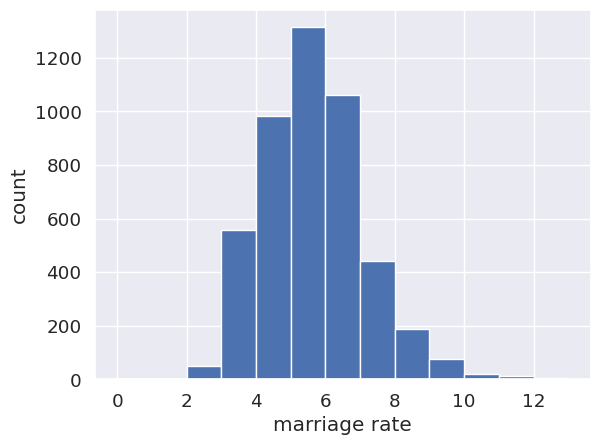

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns

# uses seaborn to adjust font size; sometimes not necessary, but 1.2 is a good default
# sns.set(font_scale=1.2)

# set the bins based on the range of the feature of interest
bins = np.linspace(0, 13, 14)

# use matplotlib to make the histogram
plt.hist(df_korea['Marriage_rate'], bins=bins)
plt.xlabel('marriage rate')
plt.ylabel('count')

# the below will save the histogram as a .pdf file in your directory
f = 'korea_marriage_hist.pdf'
with PdfPages(f) as pdf:
    pdf.savefig(bbox_inches='tight')

Text(0, 0.5, 'density')

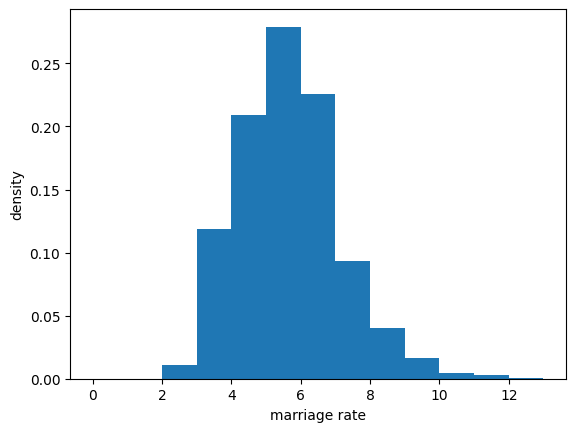

In [6]:
# change the y-axis to represent the density (so that the sum of all columns is 1)
plt.hist(df_korea['Marriage_rate'], bins=bins, density=True)
plt.xlabel('marriage rate')
plt.ylabel('density')

# Subplots
Subplots are useful for showing multiple views of the data side by side.

goal: show relationship between `Marriage_rate` as `Region` varies.

- `plt.subplot(n_rows, n_cols, desired_subplot)`
- figure vs axis (`plt.gcf()` and `plt.gca()`)
- labelling subplot title
- making a bigger figure
    - `plt.figure(figsize=(10, 5))`
        - make a new figure and specify its size
    - `plt.gcf().set_size_inches(15, 7)`
        - get the current figure `gcf()` and set its size
- `plt.ylim()`

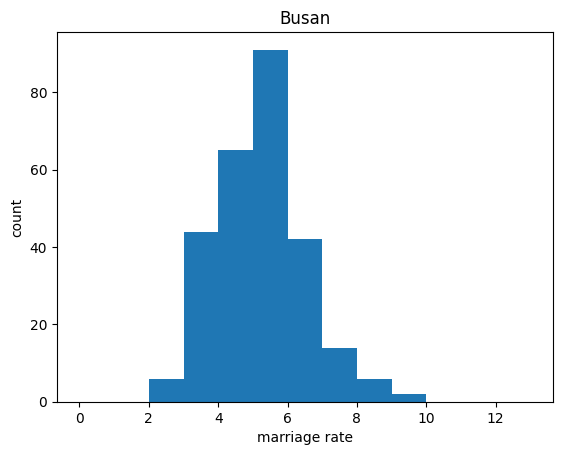

In [21]:
# build one plot, then add loop to make subplot
# let's do Busan
bool_busan = df_korea['Region'] == 'Busan'
df_busan = df_korea.loc[bool_busan, :]

plt.hist(df_busan['Marriage_rate'], bins=bins)
plt.xlabel('marriage rate')
plt.ylabel('count')
plt.gca().title.set_text('Busan') 

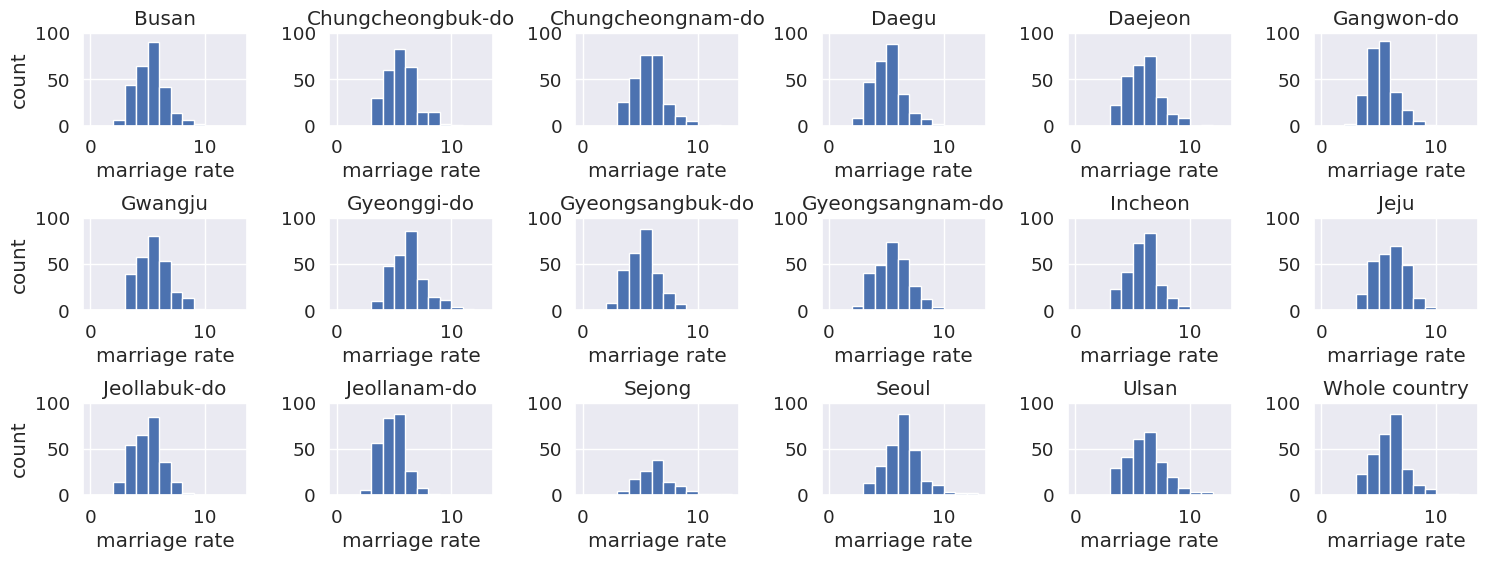

In [8]:
# now all of the regions
# a useful function to convert an array to a list is .tolist()
region_list = df_korea['Region'].unique().tolist()

for region in region_list:
    # activate a specific subplot (use .index() to find the numeric index for the current string)
    region_idx = region_list.index(region)
    plt.subplot(3, 6, region_idx + 1)
    
    # build df_region, only includes rows with region of interest
    bool_region = df_korea['Region'] == region
    df_region = df_korea.loc[bool_region, :]
    
    # plot histogram
    plt.hist(df_region['Marriage_rate'], bins=bins)
    
    plt.xlabel('marriage rate')
    # we only want the y-axis label on the first subplot of each row
    if region_idx in (0, 6, 12):
        plt.ylabel('count')
    
    plt.gca().title.set_text(region_list[region_idx]) 
    
    # may need to play around with this to make sure all plots have same/informative y range
    plt.ylim(0, 100)
    
# resizes the whole figure .set_size_inches(width_inches, height_inches) 
plt.gcf().set_size_inches(18, 6)

# (++) adjust spacing between graphs (can play around with this until it looks nice)
plt.subplots_adjust(wspace=.5, hspace=1)

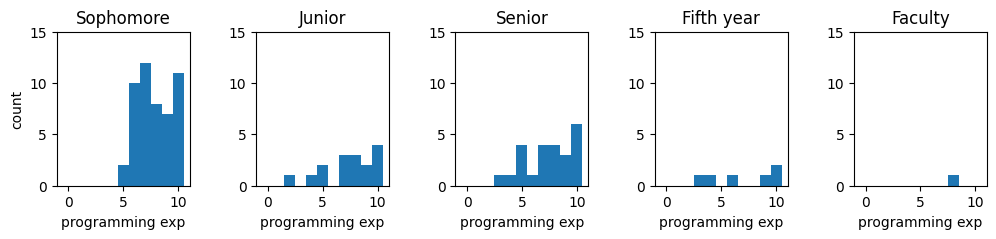

In [23]:
# another example with our gtky data
# how does programming experience vary based on class?
grade_list = gtky['class'].unique().tolist()

# new bins, correspond to putting all 0's, 1's, etc. in the same bin
bins = np.linspace(-.5, 10.5, 12)

for grade in grade_list: # note we can't use the class variable name, so we switch to grade
    # activate a specific subplot
    grade_idx = grade_list.index(grade)
    plt.subplot(1, 5, grade_idx + 1)
    
    # build df_grade
    bool_grade = gtky['class'] == grade
    df_grade = gtky.loc[bool_grade, :]
    
    # plot histogram
    plt.hist(df_grade['prog_exp'], bins=bins)
    
    plt.xlabel('programming exp')
    if grade_idx == 0:
        plt.ylabel('count')
    
    plt.gca().title.set_text(grade_list[grade_idx]) 
    
    plt.ylim(0, 15)
    
# resizes the whole figure .set_size_inches(width_inches, height_inches) 
plt.gcf().set_size_inches(12, 2)

# (++) adjust spacing between graphs
plt.subplots_adjust(wspace=.5, hspace=1)


## Scatter plots

What is the relationship between `Marriage_rate` and `National_growth_rate` in:
1. `Seoul`
1. `Busan`

skills:
- `plt.scatter`
- `alpha`
- multiple scatters on same plot
- legend
- log scale

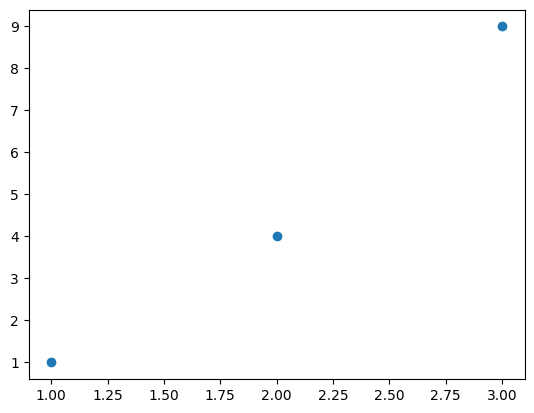

In [24]:
# simple scatter example
x = [1, 2, 3]
y = [1, 4, 9]
plt.scatter(x, y)

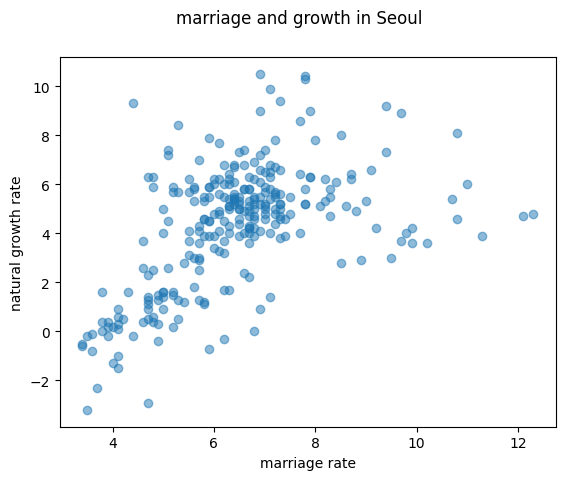

In [25]:
# select only rows corresponding to given region
bool_seoul = df_korea['Region'] == 'Seoul'
df_seoul = df_korea.loc[bool_seoul, :]

# scatter
plt.scatter(df_seoul['Marriage_rate'],
            df_seoul['Natural_growth_rate'], alpha=.5)

# label
plt.xlabel('marriage rate')
plt.ylabel('natural growth rate')
plt.suptitle('marriage and growth in Seoul');

Text(0, 0.5, 'natural growth rate')

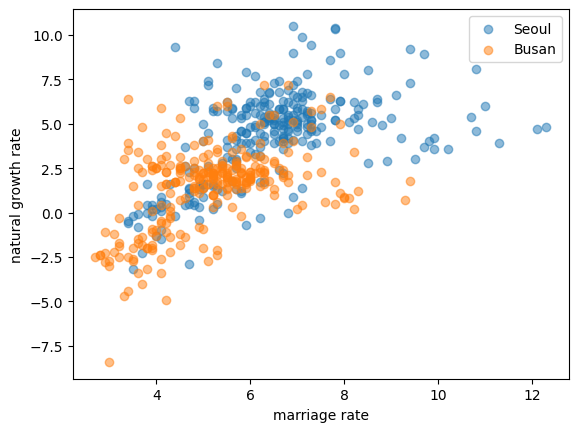

In [26]:
two_regions = ['Seoul', 
               'Busan']

for region in two_regions:
    # boolean index
    bool_region = df_korea['Region'] == region
    df_region = df_korea.loc[bool_region, :]

    # scatter
    plt.scatter(df_region['Marriage_rate'],
                df_region['Natural_growth_rate'], alpha=.5, label=region)
    
plt.legend()
plt.xlabel('marriage rate')
plt.ylabel('natural growth rate')
# plt.gcf().set_size_inches(10, 8)
# plt.suptitle('comparing relationship of marriage and growth in Seoul and Busan');

Text(0, 0.5, 'programming experience')

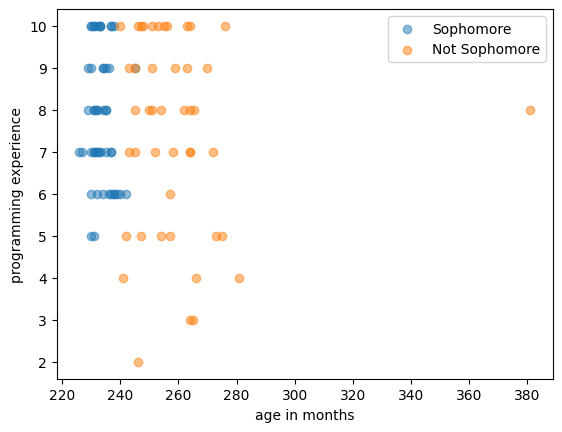

In [27]:
# what about seeing if there is a relationship between programming experience and age in months for Sophomores and everyone else?

for is_soph in range(2):
    # ifelse to grab
    if is_soph == 0:
        bool_soph = gtky['class'] == 'Sophomore'
        label = 'Sophomore'
        df_soph = gtky.loc[bool_soph, :]
    else:
        bool_soph = gtky['class'] != 'Sophomore'
        label = 'Not Sophomore'
        df_soph = gtky.loc[bool_soph, :]

    # scatter
    plt.scatter(df_soph['age_months'],
                df_soph['prog_exp'], alpha=.5, label=label)
    
plt.legend()
plt.xlabel('age in months')
plt.ylabel('programming experience')
# plt.gcf().set_size_inches(10, 8)
# plt.suptitle('comparing relationship of marriage and growth in Seoul and Busan');

# Line Plots

What was the change in mean `marriage_rate` over time in the dataset?

- `plt.plot()` (line plot)
- cleaning data to answer the question
- `groupby`
- line style (width, color, dot/dash)

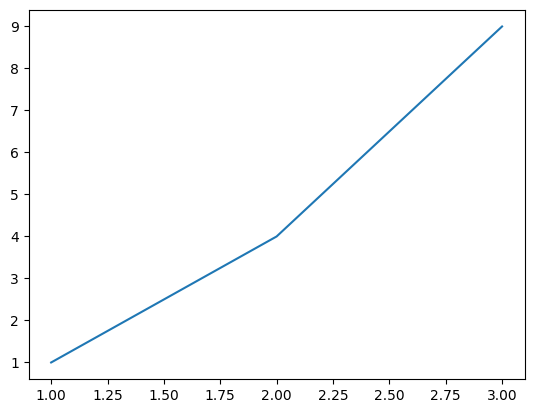

In [28]:
# simple line plot example
x = [1, 2, 3]
y = [1, 4, 9]
plt.plot(x, y)

In [27]:
# can look at the unique dates in the data set
# df_korea['Date'].unique()

# unfortunately, these are strings right now, not dates
# use .to_datetime from pandas to convert a string column to a date (pay attention to format of dates)
df_korea['Date'] = pd.to_datetime(df_korea['Date'], format = '%m/%d/%Y')
df_korea.head()

,Date,Region,Birth,Birth_rate,Death,Death_rate,Divorce,Divorce_rate,Marriage,Marriage_rate,Natural_growth,Natural_growth_rate
0,2000-01-01,Busan,3752.0,11.61,1875.0,5.8,814.0,2.5,2435.0,7.5,1877.0,5.8
1,2000-01-01,Chungcheongbuk-do,1903.0,15.06,924.0,7.3,220.0,1.7,828.0,6.6,979.0,7.7
2,2000-01-01,Chungcheongnam-do,2398.0,14.75,1466.0,9.0,321.0,2.0,1055.0,6.5,932.0,5.7
3,2000-01-01,Daegu,3057.0,14.39,1117.0,5.3,422.0,2.0,1577.0,7.4,1940.0,9.1
4,2000-01-01,Daejeon,1859.0,16.08,565.0,4.9,280.0,2.4,868.0,7.5,1294.0,11.2


In [28]:
# need to remove the Whole country observations (otherwise mean will be skewed)
bool_nocountry = df_korea['Region'] != 'Whole country'
df_korea_new = df_korea.loc[bool_nocountry, :]

# check the values of Region in the new data set to make sure Whole country is gone
df_korea_new['Region'].unique()

array(['Busan', 'Chungcheongbuk-do', 'Chungcheongnam-do', 'Daegu',
       'Daejeon', 'Gangwon-do', 'Gwangju', 'Gyeonggi-do',
       'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Incheon', 'Jeju',
       'Jeollabuk-do', 'Jeollanam-do', 'Sejong', 'Seoul', 'Ulsan'],
      dtype=object)

In [29]:
mean_marriage_by_date = df_korea_new.groupby('Date')['Marriage_rate'].mean()
mean_marriage_by_date

Date
2000-01-01    7.306250
2000-02-01    6.956250
2000-03-01    7.437500
2000-04-01    6.912500
2000-05-01    8.356250
                ...   
2022-02-01    3.870588
2022-03-01    3.447059
2022-04-01    3.658824
2022-05-01    3.805882
2022-06-01    3.452941
Name: Marriage_rate, Length: 270, dtype: float64

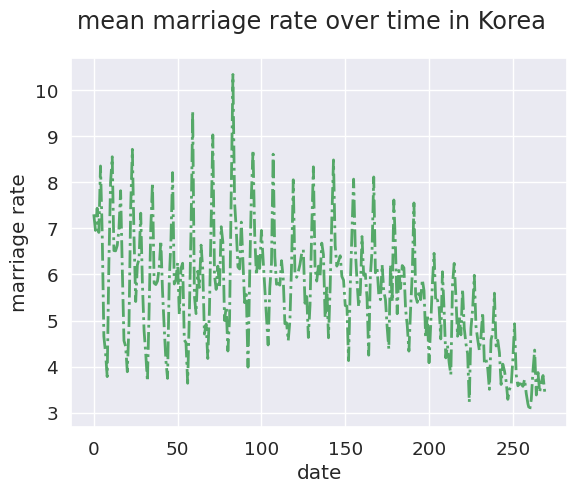

In [30]:
# linestyle ':' dotted, '--' dashed, '-.' mixed, '-' solid
date = range(mean_marriage_by_date.size)
plt.plot(date, mean_marriage_by_date,
        color='g', linewidth=2, linestyle='-.')
plt.xlabel('date')
plt.ylabel('marriage rate')
plt.suptitle('mean marriage rate over time in Korea');


# Rest of Class Exercise (if time)

Download the `pokedata.csv` file from the Homeworks Module in Canvas and make sure it is stored in the same directory as this `day5.ipynb` lecture file. In the time we have left make **at least one** (more if you have more time) plot that demonstrates the answer to some question(s) you might be interested in concerning the original 151 Pokémon. If you are struggling to come up with a question, below are some *suggestions*. When you are done, share your findings with your neighbor(s), making sure to explain what the plot you made means/how it helps answer your question.

Some possible questions to address with your plot(s):
- How does Pokémon height differ across types?
- Do Pokémon with higher Pokédex values generally have better (higher) damage?
- What is the relationship between a Pokémon's weight and their speed?